<a href="https://colab.research.google.com/github/gustianaditama/skripsi/blob/main/gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from fastprogress import master_bar, progress_bar
!wget https://raw.githubusercontent.com/gustianaditama/skripsi/main/Daily_Gold_Price_on_World.csv

--2023-06-17 09:11:04--  https://raw.githubusercontent.com/gustianaditama/skripsi/main/Daily_Gold_Price_on_World.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1825147 (1.7M) [text/plain]
Saving to: ‘Daily_Gold_Price_on_World.csv.4’

Daily_Gold_Price_on 100%[===================>]   1.74M  --.-KB/s    in 0.02s   

2023-06-17 09:11:04 (83.9 MB/s) - ‘Daily_Gold_Price_on_World.csv.4’ saved [1825147/1825147]



# Prediksi

## Baca Data

In [ ]:
data = pd.read_csv('Daily_Gold_Price_on_World.csv')
data

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,1979-01-01,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,0.00,0.00,735.60,138160.45,851.29,4454.55,0.00,0.00,107470.04,0.00,194.56,193.61
2,1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,0.00,0.00,739.42,138877.01,855.71,4477.66,0.00,0.00,108027.43,0.00,192.23,192.97
3,1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,0.00,0.00,743.36,139616.26,860.26,4501.49,0.00,0.00,108602.47,0.00,193.01,194.55
4,1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,0.00,0.00,756.42,142069.10,875.38,4580.57,0.00,0.00,110510.44,0.00,196.40,197.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,2022-04-04,1930.30,1755.38,236896.07,1471.77,2406.99,1784.85,145834.17,12275.16,28386.99,7241.33,27708492.05,7090.09,64694.01,44102530.37,35208.67,2344349.41,162869.07,28141.36,2558.38
11286,2022-04-05,1944.05,1777.25,239691.65,1480.56,2418.11,1804.56,146459.87,12362.60,28616.42,7292.71,27892258.08,7140.59,64955.57,44470144.87,35459.47,2357743.90,162328.18,28373.41,2549.74
11287,2022-04-06,1930.15,1767.62,238846.40,1474.58,2412.88,1800.15,146223.33,12283.96,28452.34,7239.99,27711162.15,7089.54,64491.13,44137702.89,35341.04,2351598.13,160684.98,28274.28,2561.24
11288,2022-04-07,1932.40,1770.98,239472.66,1478.90,2431.83,1803.41,146780.27,12297.02,28489.85,7247.85,27747330.20,7097.80,64745.06,44176594.17,35440.21,2356851.54,152321.42,28536.72,2585.32


In [ ]:
data['Date'] =  pd.to_datetime(data['Date'], format="%Y-%m-%d")
data = data.set_index(['Date'])

In [ ]:
data

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
Date,,,,,,,,,,,,,,,,,,,
1979-01-01,226.00,137.06,0.00,110.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,0.00,0.00,735.60,138160.45,851.29,4454.55,0.00,0.00,107470.04,0.00,194.56,193.61
1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,0.00,0.00,739.42,138877.01,855.71,4477.66,0.00,0.00,108027.43,0.00,192.23,192.97
1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,0.00,0.00,743.36,139616.26,860.26,4501.49,0.00,0.00,108602.47,0.00,193.01,194.55
1979-01-05,225.50,138.35,44582.47,111.63,268.39,373.72,1843.57,0.00,0.00,756.42,142069.10,875.38,4580.57,0.00,0.00,110510.44,0.00,196.40,197.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,1930.30,1755.38,236896.07,1471.77,2406.99,1784.85,145834.17,12275.16,28386.99,7241.33,27708492.05,7090.09,64694.01,44102530.37,35208.67,2344349.41,162869.07,28141.36,2558.38
2022-04-05,1944.05,1777.25,239691.65,1480.56,2418.11,1804.56,146459.87,12362.60,28616.42,7292.71,27892258.08,7140.59,64955.57,44470144.87,35459.47,2357743.90,162328.18,28373.41,2549.74
2022-04-06,1930.15,1767.62,238846.40,1474.58,2412.88,1800.15,146223.33,12283.96,28452.34,7239.99,27711162.15,7089.54,64491.13,44137702.89,35341.04,2351598.13,160684.98,28274.28,2561.24


## Pre-Process


### Normalisasi min-max

In [ ]:
def minmax(data):
  max = data[0]
  min = data[0]
  for i in data:
    if i > max:
      max = i
    if i < min:
      min = i

  for index, i in enumerate(data):
    data[index] = (i-min)/(max-min)

  return data, max, min

In [ ]:
currencies = 'US dollar (USD)'

In [ ]:
data[currencies], max, min = minmax(data[currencies])
data

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
Date,,,,,,,,,,,,,,,,,,,
1979-01-01,0.004945,137.06,0.00,110.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1979-01-02,0.005378,137.29,43164.91,111.45,263.74,359.62,1792.85,0.00,0.00,735.60,138160.45,851.29,4454.55,0.00,0.00,107470.04,0.00,194.56,193.61
1979-01-03,0.000946,134.01,43717.90,107.98,264.39,365.87,1802.15,0.00,0.00,739.42,138877.01,855.71,4477.66,0.00,0.00,108027.43,0.00,192.23,192.97
1979-01-04,0.003405,136.79,43674.89,110.66,264.14,366.38,1811.74,0.00,0.00,743.36,139616.26,860.26,4501.49,0.00,0.00,108602.47,0.00,193.01,194.55
1979-01-05,0.004675,138.35,44582.47,111.63,268.39,373.72,1843.57,0.00,0.00,756.42,142069.10,875.38,4580.57,0.00,0.00,110510.44,0.00,196.40,197.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.926039,1755.38,236896.07,1471.77,2406.99,1784.85,145834.17,12275.16,28386.99,7241.33,27708492.05,7090.09,64694.01,44102530.37,35208.67,2344349.41,162869.07,28141.36,2558.38
2022-04-05,0.933470,1777.25,239691.65,1480.56,2418.11,1804.56,146459.87,12362.60,28616.42,7292.71,27892258.08,7140.59,64955.57,44470144.87,35459.47,2357743.90,162328.18,28373.41,2549.74
2022-04-06,0.925958,1767.62,238846.40,1474.58,2412.88,1800.15,146223.33,12283.96,28452.34,7239.99,27711162.15,7089.54,64491.13,44137702.89,35341.04,2351598.13,160684.98,28274.28,2561.24


### Visualisasi data

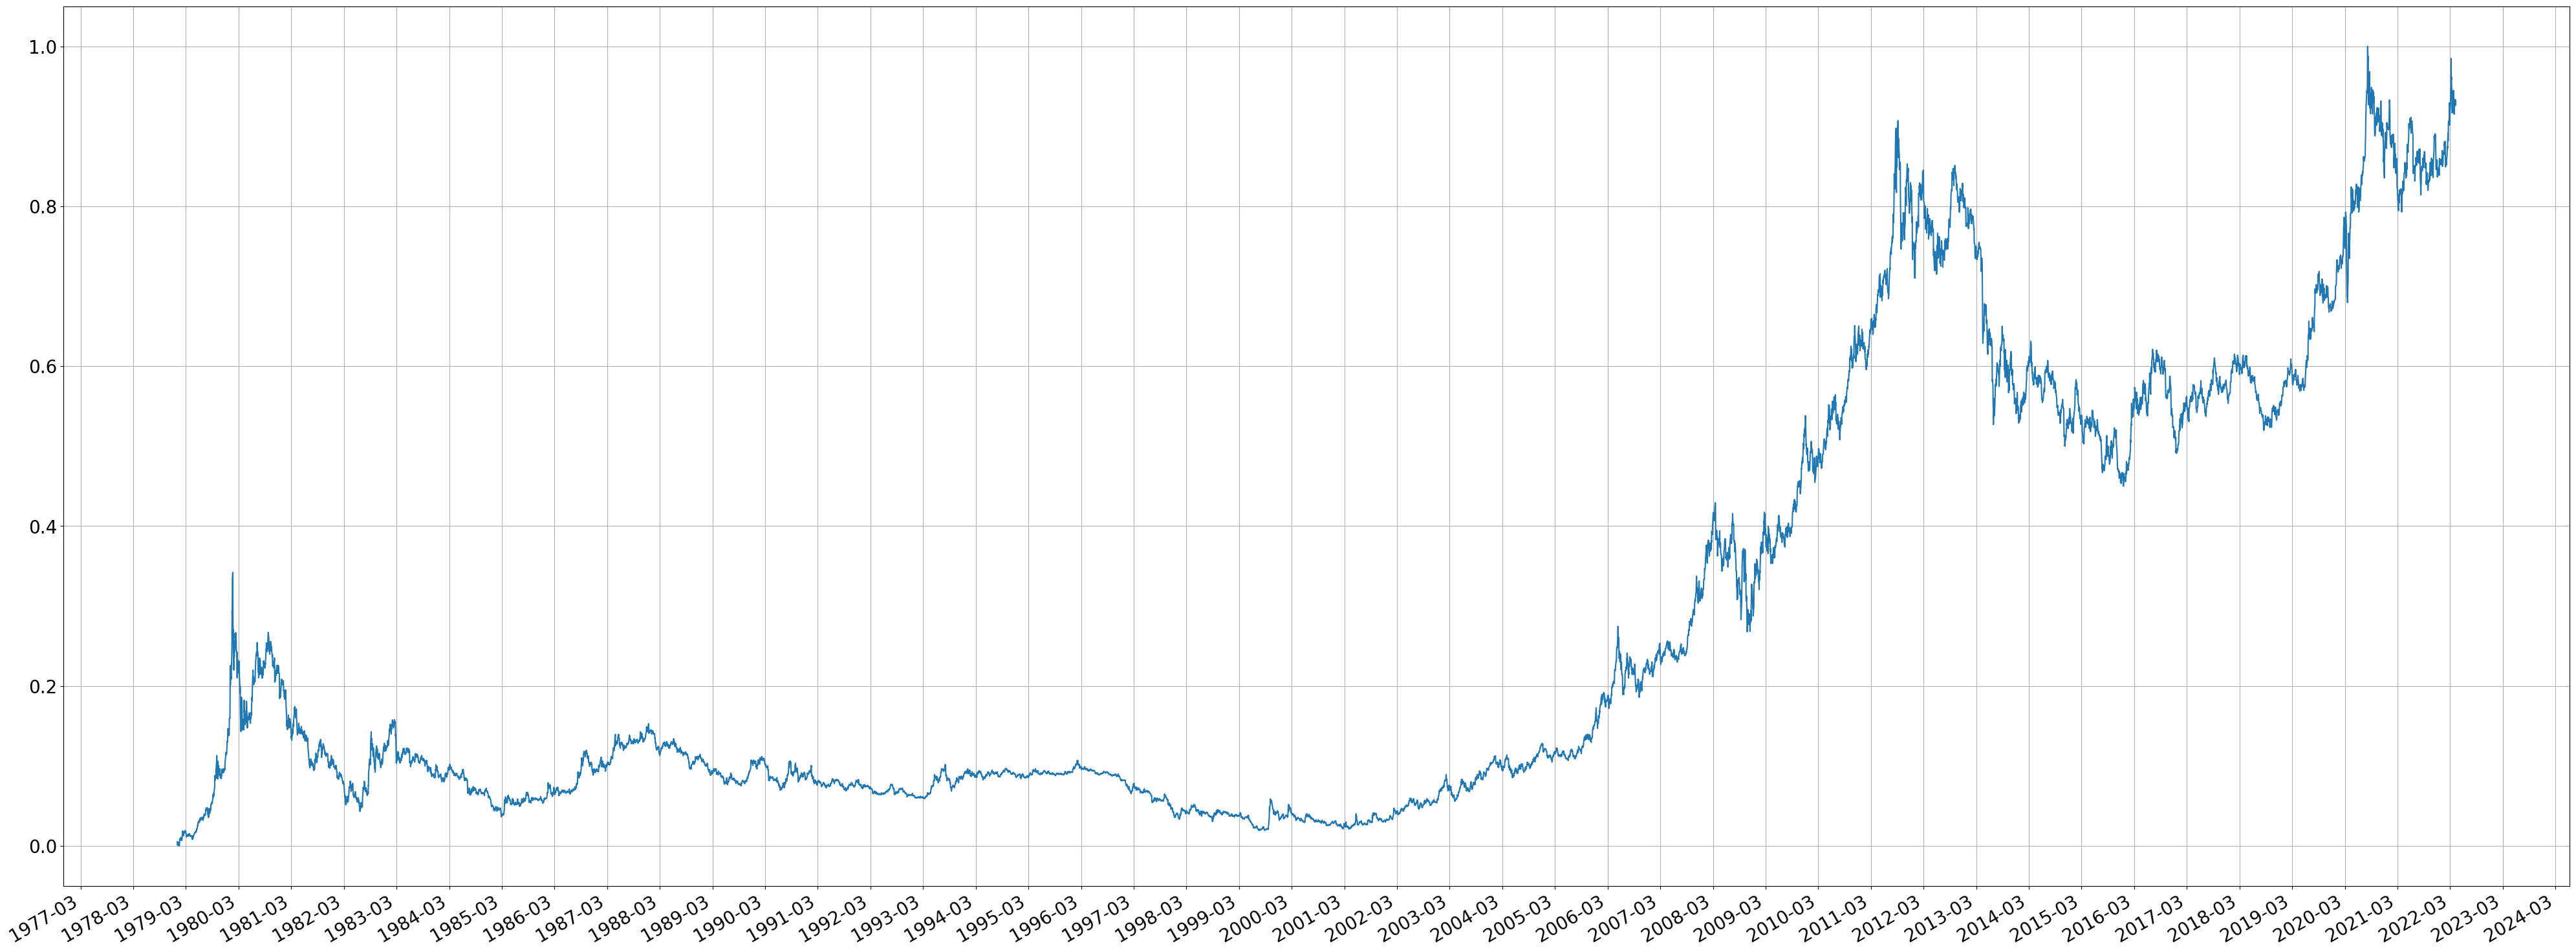

In [ ]:
fig, ax = plt.subplots(figsize=(50, 20))
sep = mdates.MonthLocator(interval=12)
date_format = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_locator(sep)
ax.xaxis.set_major_formatter(date_format)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(20)
ax.plot(data[currencies])
ax.grid(True)
fig.autofmt_xdate()

### Membuat sekuensial data

In [ ]:
def sequential(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        x1 = data[i:(i+seq_length)]
        y1 = data[i+seq_length]
        x.append(x1)
        y.append(y1)

    return np.array(x),np.array(y)

In [ ]:
X = np.array(data[currencies]).reshape(-1,1)
seq_length = 10
x, y = sequential(X, seq_length)
print(x.shape)
print(y.shape)

(11279, 10, 1)
(11279, 1)


### Membagi data latih-data uji

In [ ]:
train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

dataX = torch.Tensor(np.array(x)) #Keseluruhan data
dataY = torch.Tensor(np.array(y)) #Keseluruhan label

trainX = torch.Tensor(np.array(x[0:train_size])) #Data latih
trainY = torch.Tensor(np.array(y[0:train_size])) #label latih

testX = torch.Tensor(np.array(x[train_size:len(x)])) #Data uji
testY = torch.Tensor(np.array(y[train_size:len(y)])) #Label uji

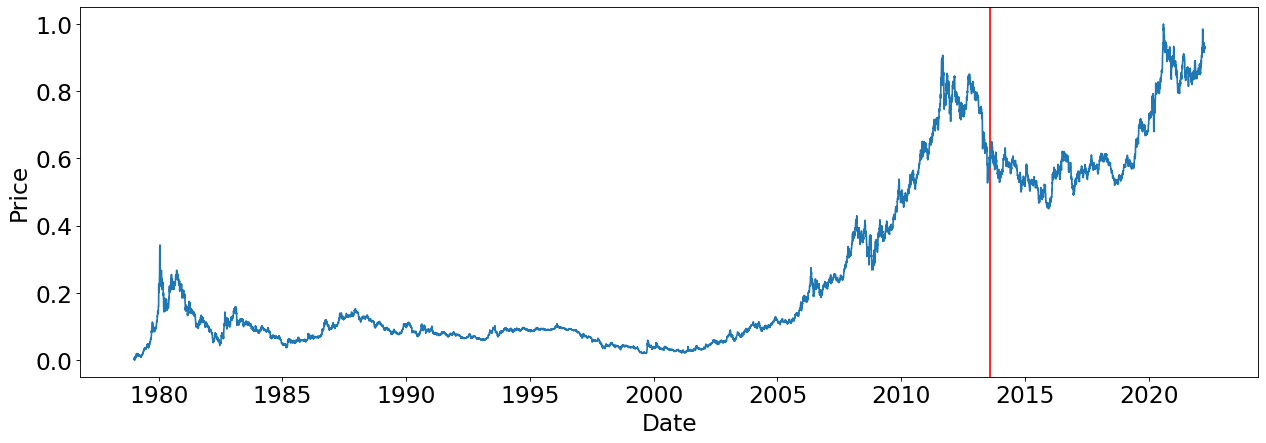

In [ ]:
figure(num=None, figsize=(19, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axvline(x=data[currencies].index[train_size], c='r')
plt.plot(data[currencies])
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

## Training

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

In [ ]:
num_epochs = 200
learning_rate = 1e-3
input_size = 1
hidden_size = 150
num_layers = 1

lstm = LSTM(input_size, hidden_size, num_layers).to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate,weight_decay=1e-5)

train_hist = np.zeros(num_epochs)
test_hist = np.zeros(num_epochs)

for epoch in progress_bar(range(num_epochs)):
    trainX = trainX.to(device)
    trainY = trainY.to(device)
    testX = testX.to(device)
    testY = testY.to(device)

    outputs = lstm(trainX)
    optimizer.zero_grad()

    loss = criterion(outputs, trainY) #Membandingkan antara hasil dengan data latih dengan data latih
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      valid = lstm(testX)
      val_loss = criterion(valid, testY) #Membandingkan antara hasil dengan data uji dengan data uji
      test_hist[epoch] = val_loss.item()

    train_hist[epoch] = loss.item()
    if epoch % 5 == 0:
        print("Epoch: %d, train loss: %1.5f test loss:  %1.5f " %(epoch, loss.cpu().item(),val_loss.cpu().item()))

Epoch: 0, train loss: 0.06550 test loss:  0.38046 
Epoch: 5, train loss: 0.03680 test loss:  0.20711 
Epoch: 10, train loss: 0.03519 test loss:  0.13661 
Epoch: 15, train loss: 0.02699 test loss:  0.15201 
Epoch: 20, train loss: 0.01995 test loss:  0.11014 
Epoch: 25, train loss: 0.00614 test loss:  0.00075 
Epoch: 30, train loss: 0.00309 test loss:  0.00867 
Epoch: 35, train loss: 0.00217 test loss:  0.01008 
Epoch: 40, train loss: 0.00145 test loss:  0.00647 
Epoch: 45, train loss: 0.00161 test loss:  0.00161 
Epoch: 50, train loss: 0.00048 test loss:  0.00221 
Epoch: 55, train loss: 0.00084 test loss:  0.00425 
Epoch: 60, train loss: 0.00037 test loss:  0.00119 
Epoch: 65, train loss: 0.00047 test loss:  0.00085 
Epoch: 70, train loss: 0.00028 test loss:  0.00080 
Epoch: 75, train loss: 0.00028 test loss:  0.00110 
Epoch: 80, train loss: 0.00019 test loss:  0.00046 
Epoch: 85, train loss: 0.00018 test loss:  0.00035 
Epoch: 90, train loss: 0.00014 test loss:  0.00032 
Epoch: 95, tra

## Evaluasi

In [ ]:
dataX = dataX.to(device)
train_predict = lstm(dataX)
data_predict = train_predict.cpu().data.numpy()
dataY_plot = dataY.numpy()

### Denormalisasi

In [ ]:
def reverse_minmax(data, max, min):
  for index, i in enumerate(data):
    data[index] = (i*(max-min))+min

  return data

In [ ]:
data_predict = reverse_minmax(data_predict, max, min)
dataY_plot = reverse_minmax(dataY_plot, max, min)

### Visualisasi hasil prediksi

In [ ]:
df_predict = pd.DataFrame(data_predict)
df_predict = df_predict.set_index(data.index[0:y.shape[0]])
df_labels = pd.DataFrame(dataY_plot)
df_labels = df_labels.set_index(data.index[0:y.shape[0]])

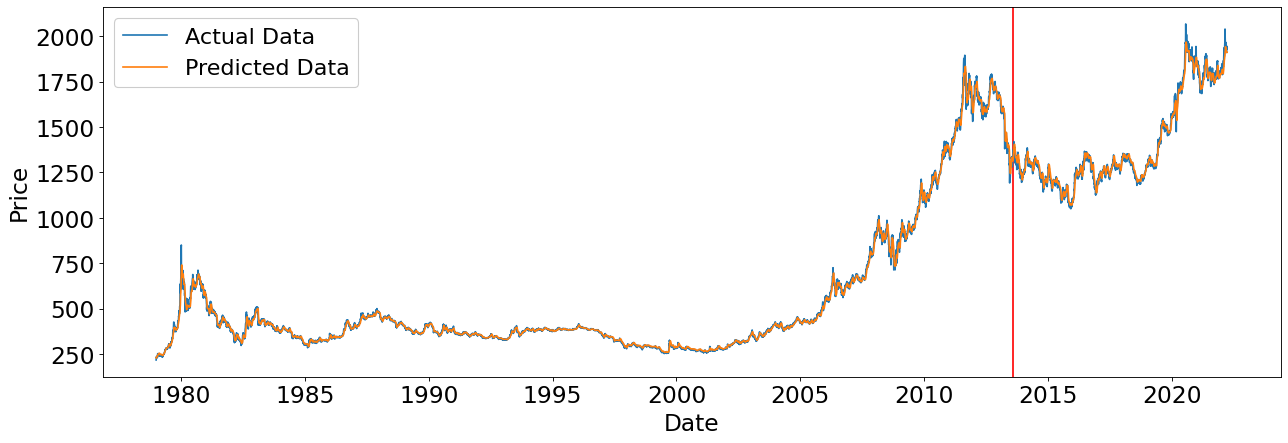

In [ ]:
#Visualisasi (garis merah membatasi data uji dengan data latih)
figure(num=None, figsize=(19, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axvline(x=data.index[train_size], c='r')
plt.plot(df_labels[0], label='Actual Data')
plt.plot(df_predict[0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

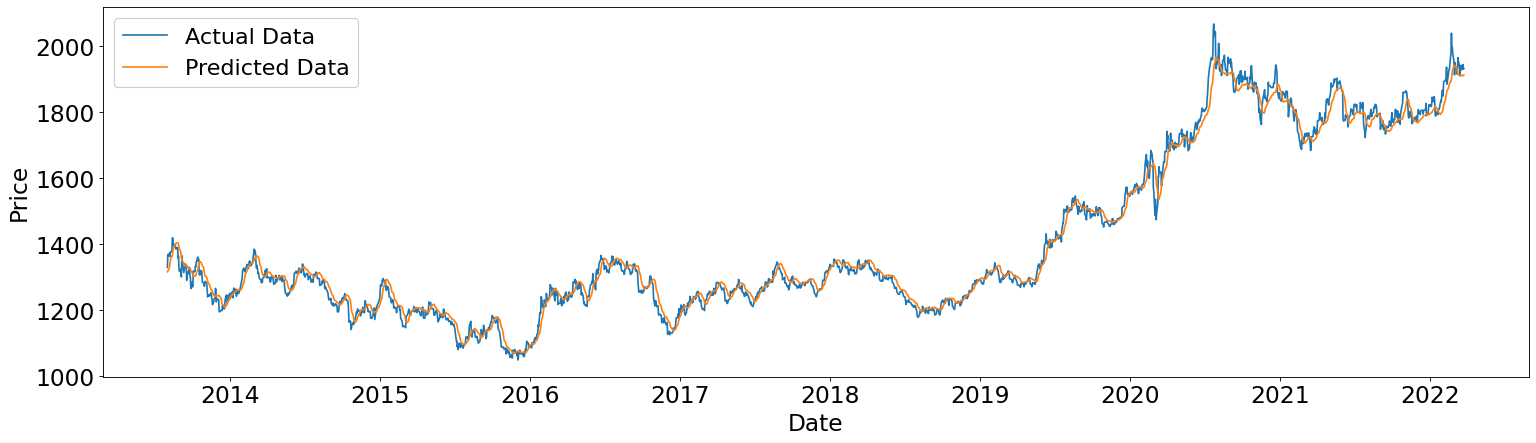

In [ ]:
#Visualisasi (hanya menunjukkan sebelah kanan dari garis merah)
figure(num=None, figsize=(23, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_labels.iloc[-testX.size()[0]:][0], label='Actual Data')
plt.plot(df_predict.iloc[-testX.size()[0]:][0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

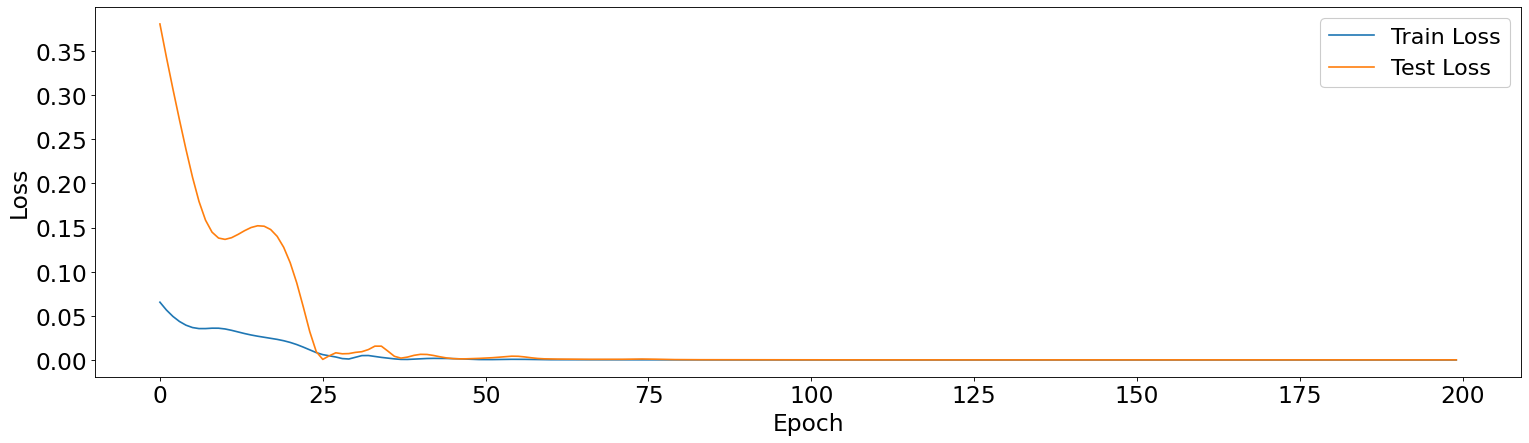

In [ ]:
figure(num=None, figsize=(23, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(train_hist, label='Train Loss')
plt.plot(test_hist, label='Test Loss')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Loss',fontsize = 21)
plt.xlabel(xlabel = 'Epoch',fontsize = 21)
plt.show()

### Parameter evaluasi

In [ ]:
#Menghitung MAPE
mape = np.mean(np.abs((dataY_plot[-testX.size()[0]:] - data_predict[-testX.size()[0]:])/dataY_plot[-testX.size()[0]:]))*100
print(f'MAPE = {mape}')

MAPE = 1.3968363404273987


In [ ]:
#Menghitung RMSE
rmse = np.sqrt(((dataY_plot[-testX.size()[0]:] - data_predict[-testX.size()[0]:]) ** 2).mean())
print(f'RMSE: {rmse}')

RMSE: 26.386714935302734


#Manualisasi

In [ ]:
w_manui = torch.Tensor([[-0.688], [0.113], [0.899], [0.532]])
w_manuh = torch.Tensor([[0.329], [0.271], [-0.937], [0.572]])
b_manui = torch.Tensor([-0.671, -0.581, -0.114, 0.507])
b_manuh = torch.Tensor([0.141, 0.981, -0.245, 0.632])
w_manulin = torch.Tensor([[0.414]])
b_manulin = torch.Tensor([0.155])
new_state_dict = {'lstm.weight_ih_l0': w_manui,'lstm.weight_hh_l0': w_manuh,'lstm.bias_ih_l0': b_manui,'lstm.bias_hh_l0': b_manuh,'fc.weight': w_manulin,'fc.bias': b_manulin}

In [ ]:
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        ula, (h_out, c_out) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        print(f'Hidden State Final: {h_out[0][0]}')
        print(f'Cell State Final: {c_out[0][0][0]}')
        out = self.fc(h_out)
        print(f'Output: {out[0][0]}')
        return out

In [ ]:
num_epochs = 1
input_size = 1
hidden_size = 1
num_layers = 1

lstm = LSTM(input_size, hidden_size, num_layers)

In [ ]:
lstm.load_state_dict(new_state_dict, strict=False)

<All keys matched successfully>

In [ ]:
wi = lstm.lstm.weight_ih_l0.clone().detach().numpy()
wh = lstm.lstm.weight_hh_l0.clone().detach().numpy()
bi = lstm.lstm.bias_ih_l0.clone().detach().numpy()
bh = lstm.lstm.bias_hh_l0.clone().detach().numpy()
wlin = lstm.fc.weight.clone().detach().numpy()
blin = lstm.fc.bias.clone().detach().numpy()

In [ ]:
print('====BOBOT DAN BIAS AWAL====\n')
print(f'Wfi = {wi[0][0]}\nWfh = {wh[0][0]}\nBfi = {bi[0]}\nBfh = {bh[0]}\n')
print(f'Wii = {wi[1][0]}\nWih = {wh[1][0]}\nBii = {bi[1]}\nBih = {bh[1]}\n')
print(f'Wgi = {wi[2][0]}\nWgh = {wh[2][0]}\nBgi = {bi[2]}\nBgh = {bh[2]}\n')
print(f'Woi = {wi[3][0]}\nWoh = {wh[3][0]}\nBoi = {bi[3]}\nBoh = {bh[3]}\n')
print(f'Wlin = {wlin[0][0]}\nBlin = {blin[0]}')

====BOBOT DAN BIAS AWAL====

Wfi = -0.6880000233650208
Wfh = 0.32899999618530273
Bfi = -0.6710000038146973
Bfh = 0.14100000262260437

Wii = 0.11299999803304672
Wih = 0.2709999978542328
Bii = -0.5809999704360962
Bih = 0.9810000061988831

Wgi = 0.8989999890327454
Wgh = -0.9369999766349792
Bgi = -0.11400000005960464
Bgh = -0.24500000476837158

Woi = 0.5320000052452087
Woh = 0.5720000267028809
Boi = 0.5070000290870667
Boh = 0.6320000290870667

Wlin = 0.414000004529953
Blin = 0.1550000011920929


In [ ]:
manuX = torch.Tensor(x[0])
manuY = torch.Tensor(y[0])

manuX = manuX.unsqueeze(0)
manuY = manuY.unsqueeze(0)

In [ ]:
output = lstm(manuX)

Hidden State Final: -0.14101020991802216
Cell State Final: -0.1921727955341339
Output: 0.09662177413702011


In [ ]:
criterion = nn.MSELoss()
loss = criterion(output, manuY)
loss

tensor(0.0089, grad_fn=<MseLossBackward0>)

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [ ]:
dwi = lstm.lstm.weight_ih_l0.grad.clone().detach().numpy()
dwh = lstm.lstm.weight_hh_l0.grad.clone().detach().numpy()
dbi = lstm.lstm.bias_ih_l0.grad.clone().detach().numpy()
dbh = lstm.lstm.bias_hh_l0.grad.clone().detach().numpy()
dwlin = lstm.fc.weight.grad.clone().detach().numpy()
dblin = lstm.fc.bias.grad.clone().detach().numpy()

In [ ]:
print('====GRADIEN BOBOT DAN BIAS====\n')
print(f'dWfi = {dwi[0][0]}\ndWfh = {dwh[0][0]}\ndBfi = {dbi[0]}\ndBfh = {dbh[0]}\n')
print(f'dWii = {dwi[1][0]}\ndWih = {dwh[1][0]}\ndBii = {dbi[1]}\ndBih = {dbh[1]}\n')
print(f'dWgi = {dwi[2][0]}\ndWgh = {dwh[2][0]}\ndBgi = {dbi[2]}\ndBgh = {dbh[2]}\n')
print(f'dWoi = {dwi[3][0]}\ndWoh = {dwh[3][0]}\ndBoi = {dbi[3]}\ndBoh = {dbh[3]}\n')
print(f'dWlin = {dwlin[0][0]}\ndBlin = {dblin[0]}')

====GRADIEN BOBOT DAN BIAS====

dWfi = -1.6100955690490082e-05
dWfh = 0.0005948272300884128
dBfi = -0.004250857979059219
dBfh = -0.004250857979059219

dWii = -1.4638786524301395e-05
dWih = 0.0005421016248874366
dBii = -0.003863845020532608
dBih = -0.0038638447877019644

dWgi = 0.00010834943532245234
dWgh = -0.004006060305982828
dBgi = 0.028599809855222702
dBgh = 0.028599809855222702

dWoi = -7.061499673000071e-06
dWoh = 0.00024878239491954446
dBoi = -0.0017498604720458388
dBoh = -0.0017498604720458388

dWlin = -0.026662500575184822
dBlin = 0.1890820562839508


In [ ]:
wi2 = lstm.lstm.weight_ih_l0.clone().detach().numpy()
wh2 = lstm.lstm.weight_hh_l0.clone().detach().numpy()
bi2 = lstm.lstm.bias_ih_l0.clone().detach().numpy()
bh2 = lstm.lstm.bias_hh_l0.clone().detach().numpy()
wlin2 = lstm.fc.weight.clone().detach().numpy()
blin2 = lstm.fc.bias.clone().detach().numpy()

In [ ]:
print('====UPDATE BOBOT DAN BIAS====\n')
print(f'Wfi = {wi2[0][0]}\nWfh = {wh2[0][0]}\nBfi = {bi2[0]}\nBfh = {bh2[0]}\n')
print(f'Wii = {wi2[1][0]}\nWih = {wh2[1][0]}\nBii = {bi2[1]}\nBih = {bh2[1]}\n')
print(f'Wgi = {wi2[2][0]}\nWgh = {wh2[2][0]}\nBgi = {bi2[2]}\nBgh = {bh2[2]}\n')
print(f'Woi = {wi2[3][0]}\nWoh = {wh2[3][0]}\nBoi = {bi2[3]}\nBoh = {bh2[3]}\n')
print(f'Wlin = {wlin2[0][0]}\nBlin = {blin2[0]}')

====UPDATE BOBOT DAN BIAS====

Wfi = -0.6879998445510864
Wfh = 0.3289940357208252
Bfi = -0.6709575057029724
Bfh = 0.14104251563549042

Wii = 0.11300014704465866
Wih = 0.2709945738315582
Bii = -0.5809613466262817
Bih = 0.9810386300086975

Wgi = 0.8989989161491394
Wgh = -0.9369599223136902
Bgi = -0.11428599804639816
Bgh = -0.2452860027551651

Woi = 0.5320000648498535
Woh = 0.5719975233078003
Boi = 0.5070175528526306
Boh = 0.6320175528526306

Wlin = 0.4142666161060333
Blin = 0.15310917794704437


In [ ]:
manu_testX = torch.Tensor(x[1])
manu_testY = torch.Tensor(y[1])
manu_testX = manu_testX.unsqueeze(0)
manu_testY = manu_testY.unsqueeze(0)
output_test = lstm(manu_testX)
output_test

Hidden State Final: -0.14160731434822083
Cell State Final: -0.19305838644504547
Output: 0.09444599598646164


tensor([[0.0944]], grad_fn=<AddmmBackward0>)

In [ ]:
manu_testX = torch.Tensor(x[1])
manu_testY = torch.Tensor(y[1])
manu_testX = manu_testX.unsqueeze(0)
manu_testY = manu_testY.unsqueeze(0)

In [ ]:
manu_testX

tensor([[[0.0054],
         [0.0009],
         [0.0034],
         [0.0047],
         [0.0034],
         [0.0039],
         [0.0021]]])

In [ ]:
loss_test = criterion(output_test, manu_testY)
loss_test

tensor(0.0085, grad_fn=<MseLossBackward0>)

In [ ]:
manuX1 = torch.Tensor(x[0])
manuY1 = torch.Tensor(y[0])

manuX1 = manuX1.unsqueeze(0)
manuY1 = manuY1.unsqueeze(0)

class LSTM1(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM1, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, hidden):
        ula, hidden = self.lstm(x, hidden)
        ula = ula.view(-1, self.hidden_size)
        print(f'Hidden State: {hidden[0]}')
        print(f'Cell State: {hidden[1]}')
        out = self.fc(ula)
        return out, hidden

hidden = None
num_epochs = 1
input_size = 1
hidden_size = 1
num_layers = 1

lstm1 = LSTM1(input_size, hidden_size, num_layers)

w_manui = torch.Tensor([[-0.688], [0.113], [0.899], [0.532]])
w_manuh = torch.Tensor([[0.329], [0.271], [-0.937], [0.572]])
b_manui = torch.Tensor([-0.671, -0.581, -0.114, 0.507])
b_manuh = torch.Tensor([0.141, 0.981, -0.245, 0.632])
w_manulin = torch.Tensor([[0.414]])
b_manulin = torch.Tensor([0.155])
new_state_dict = {'lstm.weight_ih_l0': w_manui,'lstm.weight_hh_l0': w_manuh,'lstm.bias_ih_l0': b_manui,'lstm.bias_hh_l0': b_manuh,'fc.weight': w_manulin,'fc.bias': b_manulin}
lstm1.load_state_dict(new_state_dict, strict=False)

hidden_hist = []
cell_hist = []

for i in manuX1[0]:
  i = i.unsqueeze(0)
  print(f'Data: {i[0][0]}')
  output1, hidden = lstm1(i, hidden)
  hidden_hist.append(hidden[0])
  cell_hist.append(hidden[1])
  print('')
print(f'Output: {output1}')


Data: 0.004945144057273865
Hidden State: tensor([[-0.0949]], grad_fn=<SqueezeBackward1>)
Cell State: tensor([[-0.1259]], grad_fn=<SqueezeBackward1>)

Data: 0.005377506371587515
Hidden State: tensor([[-0.1249]], grad_fn=<SqueezeBackward1>)
Cell State: tensor([[-0.1685]], grad_fn=<SqueezeBackward1>)

Data: 0.0009457925916649401
Hidden State: tensor([[-0.1361]], grad_fn=<SqueezeBackward1>)
Cell State: tensor([[-0.1849]], grad_fn=<SqueezeBackward1>)

Data: 0.003404853167012334
Hidden State: tensor([[-0.1394]], grad_fn=<SqueezeBackward1>)
Cell State: tensor([[-0.1898]], grad_fn=<SqueezeBackward1>)

Data: 0.0046749175526201725
Hidden State: tensor([[-0.1403]], grad_fn=<SqueezeBackward1>)
Cell State: tensor([[-0.1911]], grad_fn=<SqueezeBackward1>)

Data: 0.003377830609679222
Hidden State: tensor([[-0.1409]], grad_fn=<SqueezeBackward1>)
Cell State: tensor([[-0.1920]], grad_fn=<SqueezeBackward1>)

Data: 0.0038642382714897394
Hidden State: tensor([[-0.1410]], grad_fn=<SqueezeBackward1>)
Cell Sta

In [ ]:
hidden_hist

[tensor([[-0.0949]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1249]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1361]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1394]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1403]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1409]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1410]], grad_fn=<SqueezeBackward1>)]

In [ ]:
cell_hist

[tensor([[-0.1259]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1685]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1849]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1898]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1911]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1920]], grad_fn=<SqueezeBackward1>),
 tensor([[-0.1922]], grad_fn=<SqueezeBackward1>)]

# Tambahan

## Multistep

In [ ]:
data = pd.read_csv('Daily_Gold_Price_on_World.csv')
data['Date'] =  pd.to_datetime(data['Date'], format="%Y-%m-%d")
data = data.set_index(['Date'])

In [ ]:
def minmax(data):
  max = data[0]
  min = data[0]
  for i in data:
    if i > max:
      max = i
    if i < min:
      min = i

  for index, i in enumerate(data):
    data[index] = (i-min)/(max-min)

  return data, max, min

def reverse_minmax(data, max, min):
  for index, i in enumerate(data):
    data[index] = (i*(max-min))+min

  return data

In [ ]:
data['US dollar (USD)'], max, min = minmax(data['US dollar (USD)'])

def sequential_multistep(data, seq_length, target_length):
    x = []
    y = []

    for i in range(0,len(data)-seq_length-1,target_length):
        x1 = data[i:(i+seq_length)]
        y1 = data[i+seq_length:i+seq_length+target_length]
        x.append(x1)
        y.append(y1)

    return np.array(x),np.array(y)

X_multistep = np.array(data['US dollar (USD)']).reshape(-1,1)
seq_length_multistep = 10
target_length = 3
x_multistep, y_multistep = sequential_multistep(X_multistep, seq_length_multistep, target_length)

train_size_multistep = int(len(y_multistep) * 0.8)
test_size_multistep = len(y_multistep) - train_size_multistep

dataX_multistep = torch.Tensor(np.array(x_multistep))
dataY_multistep = torch.Tensor(np.array(y_multistep))

trainX_multistep = torch.Tensor(np.array(x_multistep[0:train_size_multistep]))
trainY_multistep = torch.Tensor(np.array(y_multistep[0:train_size_multistep]))

testX_multistep = torch.Tensor(np.array(x_multistep[train_size_multistep:len(x_multistep)]))
testY_multistep = torch.Tensor(np.array(y_multistep[train_size_multistep:len(y_multistep)]))

In [ ]:
class LSTM_multistep(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM_multistep, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 3)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

num_epochs_multistep = 200
learning_rate_multistep = 1e-3
input_size_multistep = 1
hidden_size_multistep = 150
num_layers_multistep = 1

lstm_multistep = LSTM_multistep(input_size_multistep, hidden_size_multistep, num_layers_multistep)

criterion_multistep = torch.nn.MSELoss()
optimizer_multistep = torch.optim.Adam(lstm_multistep.parameters(), lr=learning_rate_multistep,weight_decay=1e-5)

for epoch in progress_bar(range(num_epochs_multistep)):
    outputs_multistep = lstm_multistep(trainX_multistep)
    optimizer_multistep.zero_grad()
    trainY_multistep = torch.squeeze(trainY_multistep)
    loss_multistep = criterion_multistep(outputs_multistep, trainY_multistep)
    loss_multistep.backward()
    optimizer_multistep.step()

    with torch.no_grad():
      valid = lstm_multistep(testX_multistep)
      testY_multistep = torch.squeeze(testY_multistep)
      val_loss_multistep = criterion_multistep(valid, testY_multistep)

    if epoch % 5 == 0:
        print("Epoch: %d, train loss: %1.5f test loss:  %1.5f " %(epoch, loss_multistep.item(),val_loss_multistep.item()))

In [ ]:
train_predict_multistep = lstm_multistep(dataX_multistep)
data_predict_multistep = train_predict_multistep.data.numpy()
dataY_plot_multistep = dataY_multistep.numpy()

In [ ]:
data_predict_multistep = data_predict_multistep.reshape(data_predict_multistep.shape[0]*data_predict_multistep.shape[1],1)
dataY_plot_multistep = dataY_plot_multistep.reshape(dataY_plot_multistep.shape[0]*dataY_plot_multistep.shape[1],1)

In [ ]:
data_predict_multistep = reverse_minmax(data_predict_multistep, max, min)
dataY_plot_multistep = reverse_minmax(dataY_plot_multistep, max, min)

In [ ]:
df_predict_multistep = pd.DataFrame(data_predict_multistep)
df_predict_multistep = df_predict_multistep.set_index(data.index[0:data_predict_multistep.shape[0]])
df_labels_multistep = pd.DataFrame(dataY_plot_multistep)
df_labels_multistep = df_labels_multistep.set_index(data.index[0:data_predict_multistep.shape[0]])

In [ ]:
figure(num=None, figsize=(19, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axvline(x=data.index[train_size_multistep*target_length], c='r')
plt.plot(df_labels_multistep[0], label='Actual Data')
plt.plot(df_predict_multistep[0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

In [ ]:
figure(num=None, figsize=(23, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_labels_multistep.iloc[-testX_multistep.size()[0]*target_length:][0], label='Actual Data')
plt.plot(df_predict_multistep.iloc[-testX_multistep.size()[0]*target_length:][0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

In [ ]:
mape = np.mean(np.abs((dataY_plot_multistep[-testX_multistep.size()[0]*target_length:] - data_predict_multistep[-testX_multistep.size()[0]*target_length:])/dataY_plot_multistep[-testX_multistep.size()[0]*target_length:]))*100
print(f'MAPE = {mape}')
rmse = np.sqrt(((dataY_plot_multistep[-testX_multistep.size()[0]*target_length:] - data_predict_multistep[-testX_multistep.size()[0]*target_length:]) ** 2).mean())
print(f'RMSE: {rmse}')

## RNN

In [ ]:
def minmax(data):
  max = data[0]
  min = data[0]
  for i in data:
    if i > max:
      max = i
    if i < min:
      min = i

  for index, i in enumerate(data):
    data[index] = (i-min)/(max-min)

  return data, max, min

def reverse_minmax(data, max, min):
  for index, i in enumerate(data):
    data[index] = (i*(max-min))+min

  return data

In [ ]:
X_rnn = np.array(data['US dollar (USD)']).reshape(-1,1)
seq_length_rnn = 7
x_rnn, y_rnn = sequential(X_rnn, seq_length_rnn)
print(x_rnn.shape)
print(y_rnn.shape)

(11282, 7, 1)
(11282, 1)


In [ ]:
train_size_rnn = int(len(y_rnn) * 0.8)
test_size_rnn = len(y_rnn) - train_size_rnn

dataX_rnn = torch.Tensor(np.array(x_rnn))
dataY_rnn = torch.Tensor(np.array(y_rnn))

trainX_rnn = torch.Tensor(np.array(x_rnn[0:train_size_rnn]))
trainY_rnn = torch.Tensor(np.array(y_rnn[0:train_size_rnn]))

testX_rnn = torch.Tensor(np.array(x_rnn[train_size_rnn:len(x_rnn)]))
testY_rnn = torch.Tensor(np.array(y_rnn[train_size_rnn:len(y_rnn)]))

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
class RNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        hidden = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        ula, h_out = self.rnn(x, hidden)
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

num_epochs_rnn = 200
learning_rate_rnn = 1e-3
input_size_rnn = 1
hidden_size_rnn = 150
num_layers_rnn = 1

rnn = RNN(input_size_rnn, hidden_size_rnn, num_layers_rnn).to(device)

criterion_rnn = torch.nn.MSELoss()
optimizer_rnn = torch.optim.Adam(rnn.parameters(), lr=learning_rate_rnn,weight_decay=1e-5)

for epoch in progress_bar(range(num_epochs_rnn)):
    trainX_rnn = trainX_rnn.to(device)
    trainY_rnn = trainY_rnn.to(device)
    testX_rnn = testX_rnn.to(device)
    testY_rnn = testY_rnn.to(device)

    outputs_rnn = rnn(trainX_rnn)
    optimizer_rnn.zero_grad()
    loss_rnn = criterion_rnn(outputs_rnn, trainY_rnn)
    loss_rnn.backward()
    optimizer_rnn.step()

    with torch.no_grad():
      valid_rnn = rnn(testX_rnn)
      val_loss_rnn = criterion_rnn(valid_rnn, testY_rnn)

    if epoch % 5 == 0:
        print("Epoch: %d, train loss: %1.5f test loss:  %1.5f " %(epoch, loss_rnn.cpu().item(),val_loss_rnn.cpu().item()))

Epoch: 0, train loss: 0.07646 test loss:  0.35464 
Epoch: 5, train loss: 0.03703 test loss:  0.13871 
Epoch: 10, train loss: 0.02237 test loss:  0.13348 
Epoch: 15, train loss: 0.00602 test loss:  0.00072 
Epoch: 20, train loss: 0.00488 test loss:  0.02832 
Epoch: 25, train loss: 0.00145 test loss:  0.00951 
Epoch: 30, train loss: 0.00215 test loss:  0.00514 
Epoch: 35, train loss: 0.00033 test loss:  0.00024 
Epoch: 40, train loss: 0.00058 test loss:  0.00080 
Epoch: 45, train loss: 0.00016 test loss:  0.00051 
Epoch: 50, train loss: 0.00030 test loss:  0.00153 
Epoch: 55, train loss: 0.00013 test loss:  0.00057 
Epoch: 60, train loss: 0.00009 test loss:  0.00027 
Epoch: 65, train loss: 0.00010 test loss:  0.00068 
Epoch: 70, train loss: 0.00007 test loss:  0.00021 
Epoch: 75, train loss: 0.00007 test loss:  0.00024 
Epoch: 80, train loss: 0.00006 test loss:  0.00029 
Epoch: 85, train loss: 0.00006 test loss:  0.00022 
Epoch: 90, train loss: 0.00006 test loss:  0.00020 
Epoch: 95, tra

In [ ]:
dataX_rnn = dataX_rnn.to(device)
train_predict_rnn = rnn(dataX_rnn)
data_predict_rnn = train_predict_rnn.cpu().data.numpy()
dataY_plot_rnn = dataY_rnn.numpy()

In [ ]:
data_predict_rnn = reverse_minmax(data_predict_rnn, max, min)
dataY_plot_rnn = reverse_minmax(dataY_plot_rnn, max, min)

In [ ]:
df_predict_rnn = pd.DataFrame(data_predict_rnn)
df_predict_rnn = df_predict_rnn.set_index(data.index[0:y_rnn.shape[0]])
df_labels_rnn = pd.DataFrame(dataY_plot_rnn)
df_labels_rnn = df_labels_rnn.set_index(data.index[0:y_rnn.shape[0]])

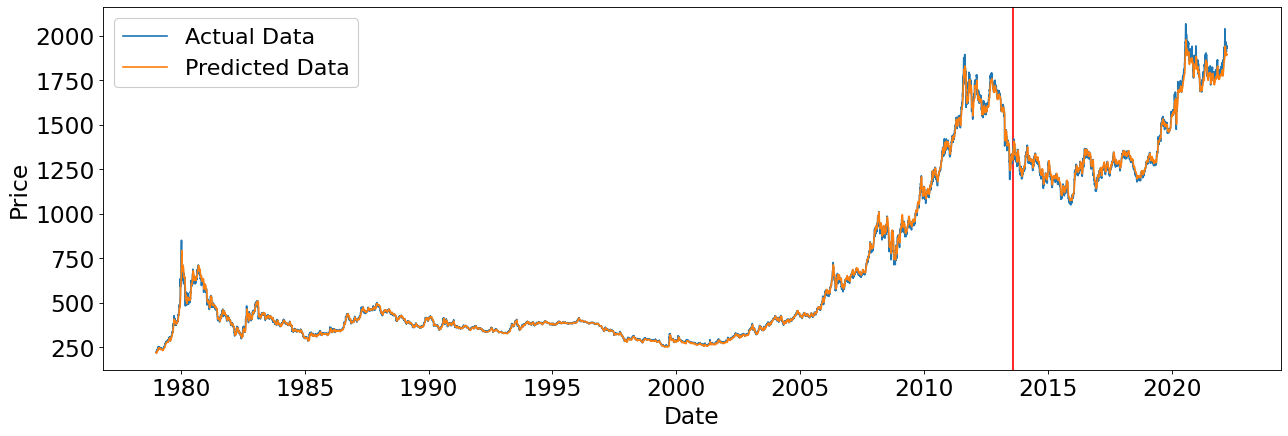

In [ ]:
figure(num=None, figsize=(19, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axvline(x=data.index[train_size_rnn], c='r')
plt.plot(df_labels_rnn[0], label='Actual Data')
plt.plot(df_predict_rnn[0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

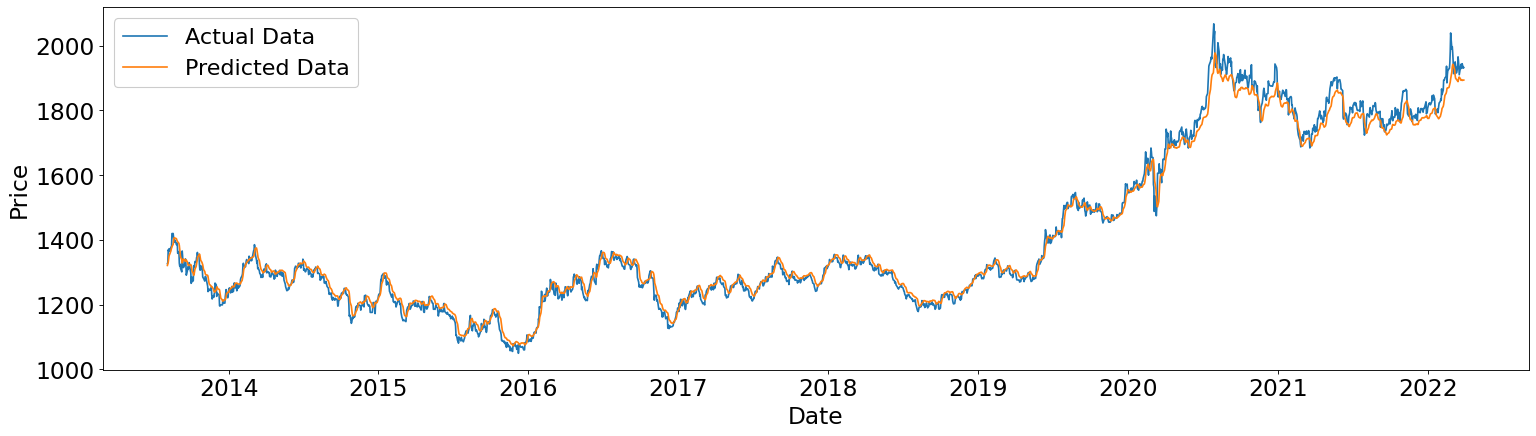

In [ ]:
figure(num=None, figsize=(23, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_labels_rnn.iloc[-testX_rnn.size()[0]:][0], label='Actual Data')
plt.plot(df_predict_rnn.iloc[-testX_rnn.size()[0]:][0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

In [ ]:
mape = np.mean(np.abs((dataY_plot_rnn[-testX_rnn.size()[0]:] - data_predict_rnn[-testX_rnn.size()[0]:])/dataY_plot_rnn[-testX_rnn.size()[0]:]))*100
print(f'MAPE = {mape}')
rmse = np.sqrt(((dataY_plot_rnn[-testX_rnn.size()[0]:] - data_predict_rnn[-testX_rnn.size()[0]:]) ** 2).mean())
print(f'RMSE: {rmse}')

MAPE = 1.3037700206041336
RMSE: 25.316255569458008


## Multivariate

In [ ]:
data_multivar = pd.read_csv('Daily_Gold_Price_on_World.csv')
data_multivar['Date'] =  pd.to_datetime(data_multivar['Date'], format="%Y-%m-%d")
data_multivar = data_multivar.set_index(['Date'])

In [ ]:
def minmax(data):
  max = data[0]
  min = data[0]
  for i in data:
    if i > max:
      max = i
    if i < min:
      min = i

  for index, i in enumerate(data):
    data[index] = (i-min)/(max-min)

  return data, max, min

def reverse_minmax_multivar(data, max, min, target_curr):
  for index, i in enumerate(data):
    data[index] = (i*(max[target_curr]-min[target_curr]))+min[target_curr]

  return data

In [ ]:
max_each_column = []
min_each_column = []

for i in data_multivar:
  data_multivar[i], max, min = minmax(data_multivar[i])
  max_each_column.append(max)
  min_each_column.append(min)

In [ ]:
data_multivar

,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
Date,,,,,,,,,,,,,,,,,,,
1979-01-01,0.004945,0.001856,0.000000,0.001857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1979-01-02,0.005378,0.001988,0.178722,0.002369,0.095930,0.189845,0.011433,0.000000,0.000000,0.094889,0.004583,0.112116,0.065871,0.000000,0.000000,0.042604,0.000000,0.005370,0.067618
1979-01-03,0.000946,0.000103,0.181012,0.000000,0.096166,0.193145,0.011492,0.000000,0.000000,0.095382,0.004606,0.112698,0.066213,0.000000,0.000000,0.042825,0.000000,0.005306,0.067395
1979-01-04,0.003405,0.001700,0.180834,0.001830,0.096075,0.193414,0.011553,0.000000,0.000000,0.095890,0.004631,0.113297,0.066565,0.000000,0.000000,0.043053,0.000000,0.005327,0.067946
1979-01-05,0.004675,0.002597,0.184591,0.002492,0.097621,0.197289,0.011756,0.000000,0.000000,0.097575,0.004712,0.115289,0.067735,0.000000,0.000000,0.043810,0.000000,0.005421,0.069130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.926039,0.931534,0.980855,0.931023,0.875489,0.942231,0.929972,0.855082,0.875514,0.934096,0.919040,0.933773,0.956657,0.920641,0.979020,0.929372,0.542691,0.776700,0.893511
2022-04-05,0.933470,0.944098,0.992430,0.937023,0.879533,0.952636,0.933962,0.861173,0.882590,0.940724,0.925135,0.940424,0.960525,0.928315,0.985994,0.934682,0.540889,0.783104,0.890493
2022-04-06,0.925958,0.938566,0.988931,0.932941,0.877631,0.950308,0.932453,0.855695,0.877530,0.933924,0.919129,0.933700,0.953657,0.921376,0.982701,0.932246,0.535413,0.780368,0.894509


In [ ]:
def sequential_multivar(data, seq_length, target_curr):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        x1 = data[i:(i+seq_length)]
        y1 = data[data.columns[target_curr]][i+seq_length]
        x.append(x1)
        y.append(y1)

    return np.array(x),np.array(y)

# x_multivar, y_multivar, target_curr = sequential_multivar(data_multivar,18,0)

In [ ]:
target_curr = 0
x_multivar, y_multivar = sequential_multivar(data_multivar, 7, target_curr)

In [ ]:
train_size_multivar = int(len(y_multivar) * 0.8)
test_size_multivar = len(y_multivar) - train_size_multivar

dataX_multivar = torch.Tensor(np.array(x_multivar))
dataY_multivar = torch.Tensor(np.array(y_multivar))

trainX_multivar = torch.Tensor(np.array(x_multivar[0:train_size_multivar]))
trainY_multivar = torch.Tensor(np.array(y_multivar[0:train_size_multivar]))

testX_multivar = torch.Tensor(np.array(x_multivar[train_size_multivar:len(x_multivar)]))
testY_multivar = torch.Tensor(np.array(y_multivar[train_size_multivar:len(y_multivar)]))

In [ ]:
trainX_multivar.shape

torch.Size([9025, 7, 19])

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
class LSTM(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

num_epochs_multivar = 200
learning_rate_multivar = 1e-3
input_size_multivar = 19
hidden_size_multivar = 150
num_layers_multivar = 1

lstm_multivar = LSTM(input_size_multivar, hidden_size_multivar, num_layers_multivar).to(device)

criterion_multivar = torch.nn.MSELoss()
optimizer_multivar = torch.optim.Adam(lstm_multivar.parameters(), lr=learning_rate_multivar,weight_decay=1e-5)

for epoch in progress_bar(range(num_epochs_multivar)):
    trainX_multivar = trainX_multivar.to(device)
    trainY_multivar = trainY_multivar.to(device)
    testX_multivar = testX_multivar.to(device)
    testY_multivar = testY_multivar.to(device)

    outputs_multivar = lstm_multivar(trainX_multivar)
    optimizer_multivar.zero_grad()
    outputs_multivar = outputs_multivar.squeeze(1)

    loss_multivar = criterion_multivar(outputs_multivar, trainY_multivar)
    loss_multivar.backward()
    optimizer_multivar.step()

    with torch.no_grad():
      valid_multivar = lstm_multivar(testX_multivar)
      valid_multivar = valid_multivar.squeeze(1)
      val_loss_multivar = criterion_multivar(valid_multivar, testY_multivar)

    if epoch % 5 == 0:
        print("Epoch: %d, train loss: %1.5f test loss:  %1.5f " %(epoch, loss_multivar.cpu().item(),val_loss_multivar.cpu().item()))

Epoch: 0, train loss: 0.05716 test loss:  0.28879 
Epoch: 5, train loss: 0.01363 test loss:  0.00849 
Epoch: 10, train loss: 0.01003 test loss:  0.01070 
Epoch: 15, train loss: 0.00205 test loss:  0.00241 
Epoch: 20, train loss: 0.00137 test loss:  0.04684 
Epoch: 25, train loss: 0.00212 test loss:  0.06470 
Epoch: 30, train loss: 0.00113 test loss:  0.01625 
Epoch: 35, train loss: 0.00068 test loss:  0.02271 
Epoch: 40, train loss: 0.00087 test loss:  0.02089 
Epoch: 45, train loss: 0.00072 test loss:  0.01191 
Epoch: 50, train loss: 0.00056 test loss:  0.01958 
Epoch: 55, train loss: 0.00053 test loss:  0.02592 
Epoch: 60, train loss: 0.00050 test loss:  0.01905 
Epoch: 65, train loss: 0.00043 test loss:  0.01990 
Epoch: 70, train loss: 0.00040 test loss:  0.01742 
Epoch: 75, train loss: 0.00037 test loss:  0.01407 
Epoch: 80, train loss: 0.00034 test loss:  0.01572 
Epoch: 85, train loss: 0.00031 test loss:  0.01481 
Epoch: 90, train loss: 0.00029 test loss:  0.01412 
Epoch: 95, tra

In [ ]:
dataX_multivar = dataX_multivar.to(device)
train_predict_multivar = lstm_multivar(dataX_multivar)
data_predict_multivar = train_predict_multivar.cpu().data.numpy()
dataY_plot_multivar = dataY_multivar.numpy()

In [ ]:
data_predict_multivar = reverse_minmax_multivar(data_predict_multivar, max_each_column, min_each_column, target_curr)
dataY_plot_multivar = reverse_minmax_multivar(dataY_plot_multivar, max_each_column, min_each_column, target_curr)

In [ ]:
df_predict_multivar = pd.DataFrame(data_predict_multivar)
df_predict_multivar = df_predict_multivar.set_index(data_multivar.index[0:y_multivar.shape[0]])
df_labels_multivar = pd.DataFrame(dataY_plot_multivar)
df_labels_multivar = df_labels_multivar.set_index(data_multivar.index[0:y_multivar.shape[0]])

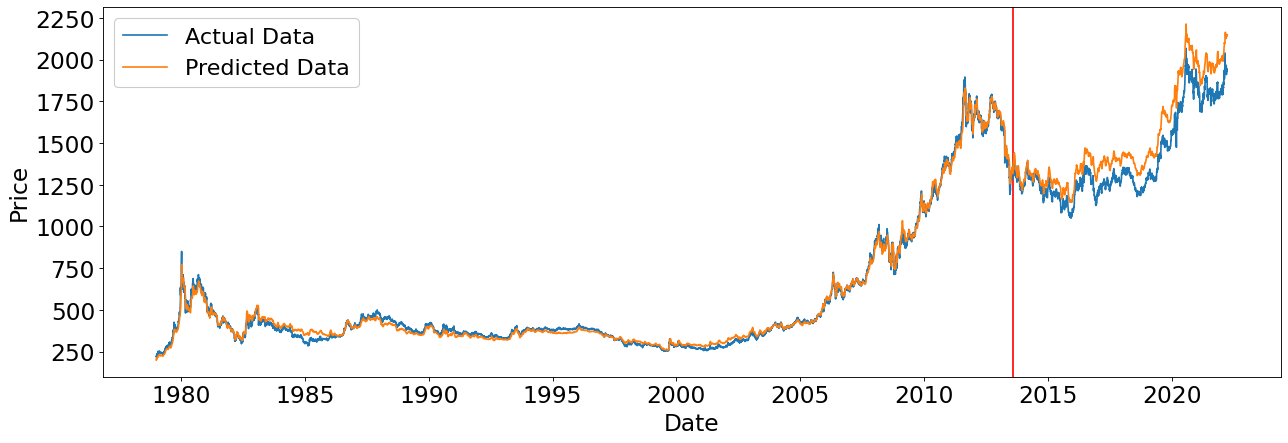

In [ ]:
figure(num=None, figsize=(19, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axvline(x=data_multivar.index[train_size_multivar], c='r')
plt.plot(df_labels_multivar[0], label='Actual Data')
plt.plot(df_predict_multivar[0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

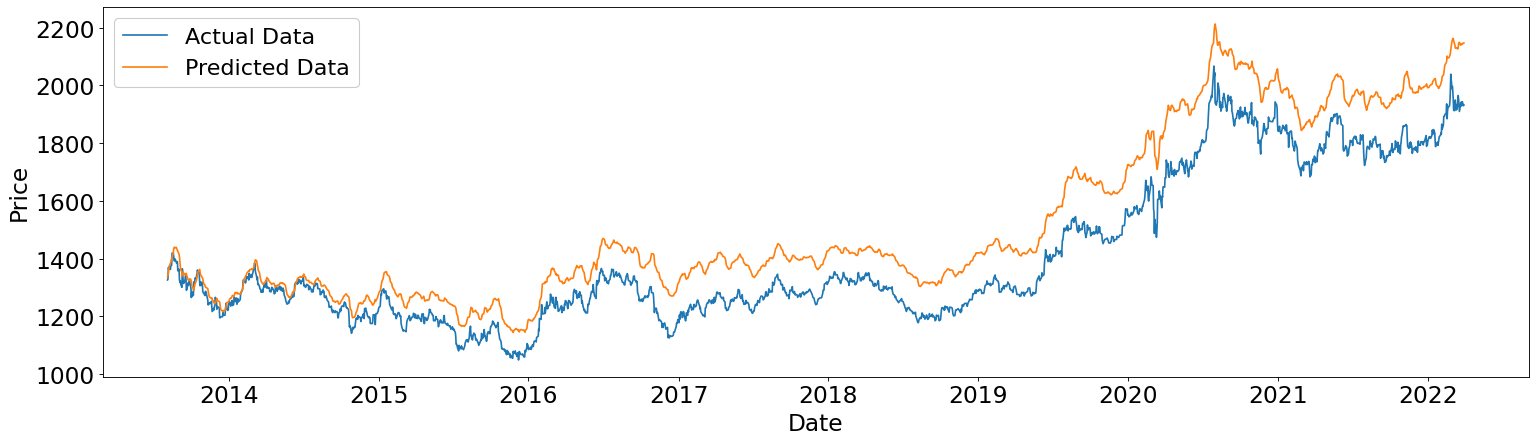

In [ ]:
figure(num=None, figsize=(23, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df_labels_multivar.iloc[-testX_multivar.size()[0]:][0], label='Actual Data')
plt.plot(df_predict_multivar.iloc[-testX_multivar.size()[0]:][0], label='Predicted Data')
plt.legend(framealpha=1, frameon=True, fontsize=20)
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.ylabel(ylabel = 'Price',fontsize = 21)
plt.xlabel(xlabel = 'Date',fontsize = 21)
plt.show()

In [ ]:
mape = np.mean(np.abs((dataY_plot_multivar[-testX_multivar.size()[0]:] - data_predict_multivar[-testX_multivar.size()[0]:])/dataY_plot_multivar[-testX_multivar.size()[0]:]))*100
print(f'MAPE = {mape}')
rmse = np.sqrt(((dataY_plot_multivar[-testX_multivar.size()[0]:] - data_predict_multivar[-testX_multivar.size()[0]:]) ** 2).mean())
print(f'RMSE: {rmse}')

MAPE = 22.18766212463379
RMSE: 398.876220703125


## Prediksi semua mata uang dengan semua mata uang

In [ ]:
data_multi = pd.read_csv('Daily_Gold_Price_on_World.csv')
data_multi['Date'] =  pd.to_datetime(data_multi['Date'], format="%Y-%m-%d")
data_multi = data_multi.set_index(['Date'])

In [ ]:
def minmax(data):
  max = data[0]
  min = data[0]
  for i in data:
    if i > max:
      max = i
    if i < min:
      min = i

  for index, i in enumerate(data):
    data[index] = (i-min)/(max-min)

  return data, max, min

def reverse_minmax_multi(data, max, min):
  for index, i in enumerate(data):
    data[index] = (i*(max-min))+min

  return data

def sequential_multi(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        x1 = data[i:(i+seq_length)]
        y1 = data.iloc[i+seq_length]
        x.append(x1)
        y.append(y1)

    return np.array(x),np.array(y)

In [ ]:
max_each_column = []
min_each_column = []

for i in data_multi:
  data_multi[i], max, min = minmax(data_multi[i])
  max_each_column.append(max)
  min_each_column.append(min)

In [ ]:
x_multi, y_multi = sequential_multi(data_multi, 10)

In [ ]:
train_size_multi = int(len(y_multi) * 0.8)
test_size_multi = len(y_multi) - train_size_multi

dataX_multi = torch.Tensor(np.array(x_multi))
dataY_multi = torch.Tensor(np.array(y_multi))

trainX_multi = torch.Tensor(np.array(x_multi[0:train_size_multi]))
trainY_multi = torch.Tensor(np.array(y_multi[0:train_size_multi]))

testX_multi = torch.Tensor(np.array(x_multi[train_size_multi:len(x_multi)]))
testY_multi = torch.Tensor(np.array(y_multi[train_size_multi:len(y_multi)]))

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
class LSTM_multi(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM_multi, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 19)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

num_epochs_multi = 200
learning_rate_multi = 1e-3
input_size_multi = 19
hidden_size_multi = 150
num_layers_multi = 1

lstm_multi = LSTM_multi(input_size_multi, hidden_size_multi, num_layers_multi).to(device)

criterion_multi = torch.nn.MSELoss()
optimizer_multi = torch.optim.Adam(lstm_multi.parameters(), lr=learning_rate_multi,weight_decay=1e-5)

for epoch in progress_bar(range(num_epochs_multi)):
    trainX_multi = trainX_multi.to(device)
    trainY_multi = trainY_multi.to(device)
    testX_multi = testX_multi.to(device)
    testY_multi = testY_multi.to(device)

    outputs_multi = lstm_multi(trainX_multi)
    optimizer_multi.zero_grad()

    loss_multi = criterion_multi(outputs_multi, trainY_multi)
    loss_multi.backward()
    optimizer_multi.step()

    with torch.no_grad():
      valid_multi = lstm_multi(testX_multi)
      val_loss_multi = criterion_multi(valid_multi, testY_multi)

    if epoch % 5 == 0:
        print("Epoch: %d, train loss: %1.5f test loss:  %1.5f " %(epoch, loss_multi.cpu().item(),val_loss_multi.cpu().item()))

Epoch: 0, train loss: 0.06217 test loss:  0.35933 
Epoch: 5, train loss: 0.03018 test loss:  0.16185 
Epoch: 10, train loss: 0.01102 test loss:  0.02905 
Epoch: 15, train loss: 0.00406 test loss:  0.04065 
Epoch: 20, train loss: 0.00527 test loss:  0.03857 
Epoch: 25, train loss: 0.00273 test loss:  0.02793 
Epoch: 30, train loss: 0.00190 test loss:  0.01909 
Epoch: 35, train loss: 0.00217 test loss:  0.01911 
Epoch: 40, train loss: 0.00170 test loss:  0.02232 
Epoch: 45, train loss: 0.00151 test loss:  0.01886 
Epoch: 50, train loss: 0.00152 test loss:  0.01924 
Epoch: 55, train loss: 0.00143 test loss:  0.02139 
Epoch: 60, train loss: 0.00137 test loss:  0.01965 
Epoch: 65, train loss: 0.00133 test loss:  0.01749 
Epoch: 70, train loss: 0.00129 test loss:  0.01796 
Epoch: 75, train loss: 0.00124 test loss:  0.01856 
Epoch: 80, train loss: 0.00120 test loss:  0.01860 
Epoch: 85, train loss: 0.00115 test loss:  0.01843 
Epoch: 90, train loss: 0.00110 test loss:  0.01832 
Epoch: 95, tra

In [ ]:
dataX_multi = dataX_multi.to(device)
train_predict_multi = lstm_multi(dataX_multi)
data_predict_multi = train_predict_multi.cpu().data.numpy()
dataY_plot_multi = dataY_multi.numpy()

In [ ]:
data_predict_multi = np.transpose(data_predict_multi)
dataY_plot_multi = np.transpose(dataY_plot_multi)

In [ ]:
for i in range(data_predict_multi.shape[0]):
  data_predict_multi[i] = reverse_minmax_multi(data_predict_multi[i], max_each_column[i], min_each_column[i])
  dataY_plot_multi[i] = reverse_minmax_multi(dataY_plot_multi[i], max_each_column[i], min_each_column[i])

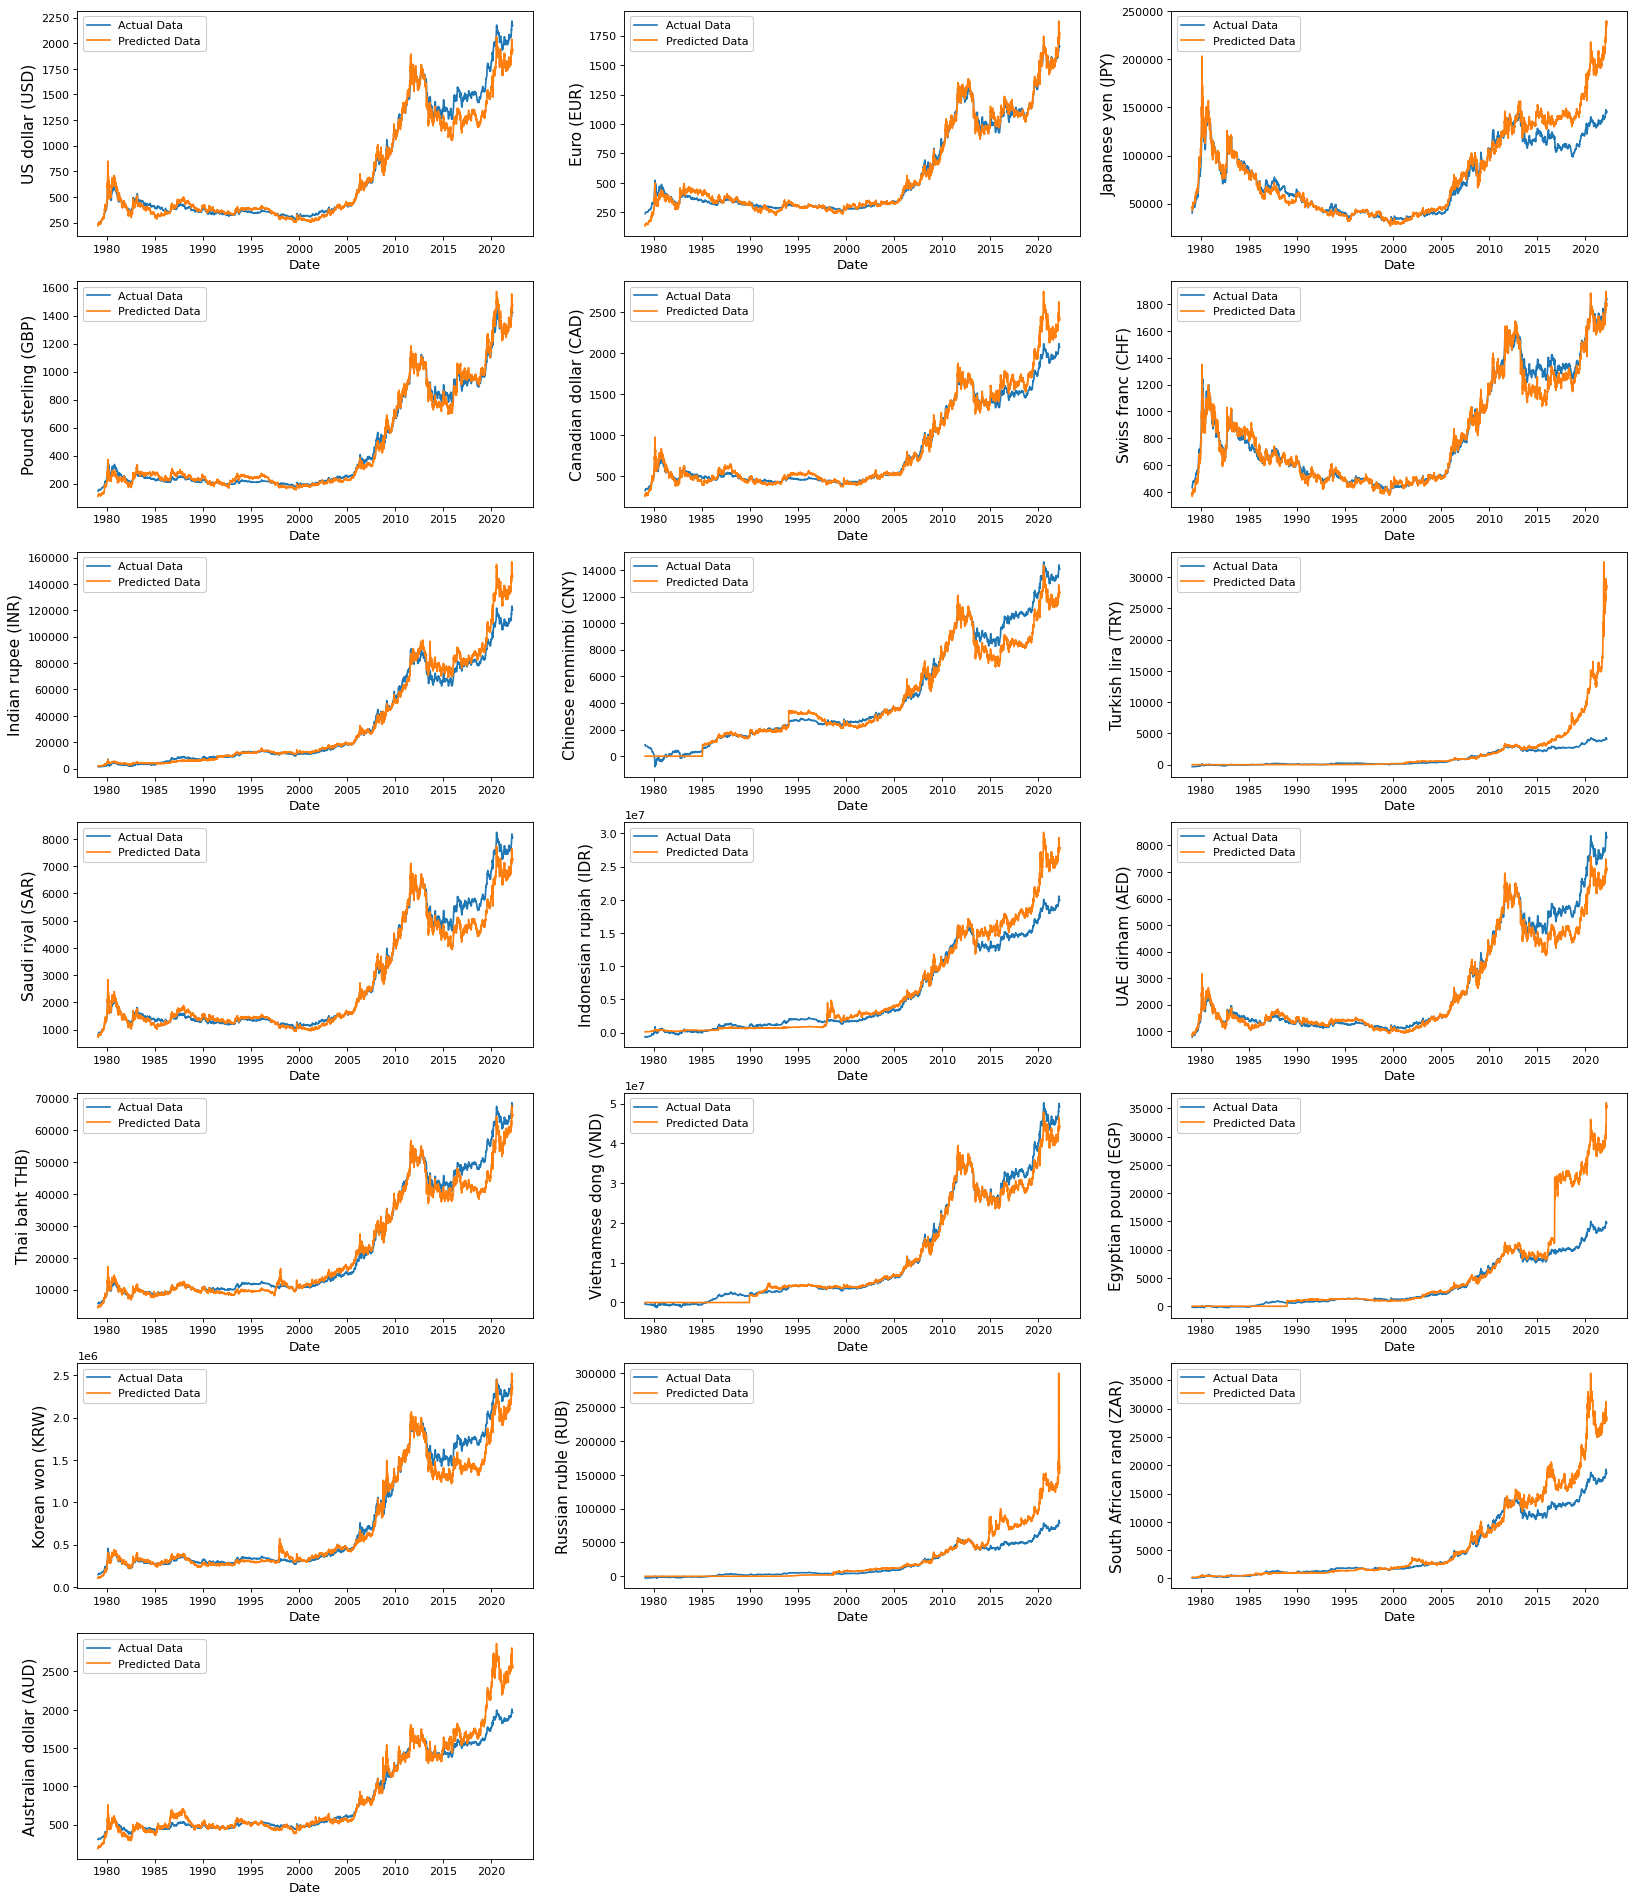

In [ ]:
figure(num=None, figsize=(25, 30), dpi=80, facecolor='w', edgecolor='k')
for i in range(data_predict_multi.shape[0]):
  plt.subplot(7,3,i+1)
  plt.plot(data_multi.index[10:-1], data_predict_multi[i], label='Actual Data')
  plt.plot(data_multi.index[10:-1], dataY_plot_multi[i], label='Predicted Data')
  plt.legend(framealpha=1, frameon=True)
  plt.ylabel(ylabel = data_multi.columns[i], fontsize=14)
  plt.xlabel(xlabel = 'Date', fontsize=12)

In [ ]:
mape_all = []
rmse_all = []

for i in range(data_predict_multi.shape[0]):
  mape = np.mean(np.abs((dataY_plot_multi[i][-testX_multi.size()[0]:] - data_predict_multi[i][-testX_multi.size()[0]:])/dataY_plot_multi[i][-testX_multi.size()[0]:]))*100
  rmse = np.sqrt(((dataY_plot_multi[i][-testX_multi.size()[0]:] - data_predict_multi[i][-testX_multi.size()[0]:]) ** 2).mean())
  mape_all.append(mape)
  rmse_all.append(rmse)

Text(0.5, 0, 'RMSE')

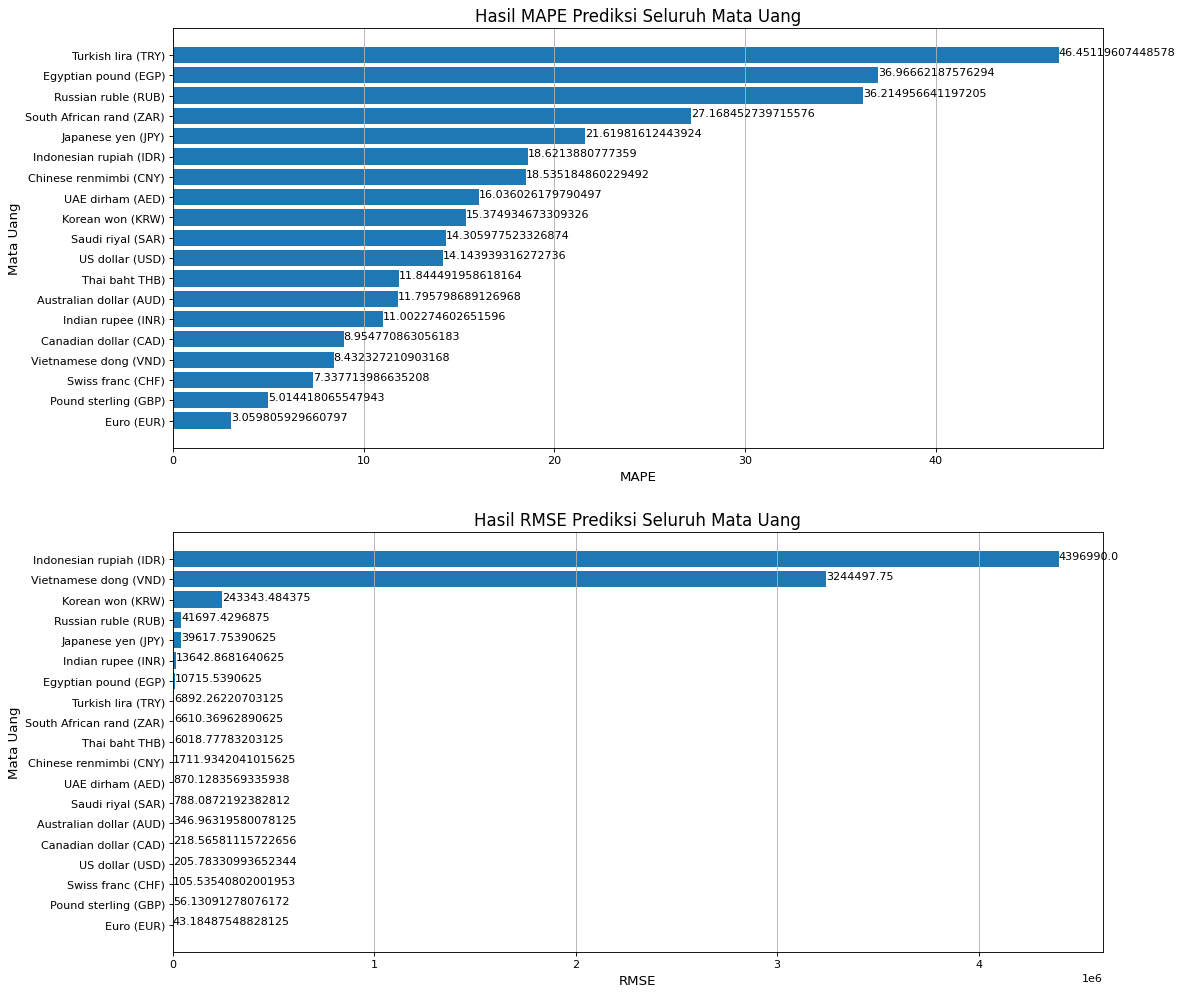

In [ ]:
df_mape = pd.DataFrame({'Currency': data_multi.columns,'MAPE': mape_all})
df_rmse = pd.DataFrame({'Currency': data_multi.columns,'RMSE': rmse_all})
df_mape = df_mape.sort_values(by=['MAPE'])
df_rmse = df_rmse.sort_values(by=['RMSE'])

figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.barh(df_mape.Currency, df_mape.MAPE)
for i, v in enumerate(df_mape.MAPE):
    plt.text(v, i, str(v))
plt.grid(axis='x')
plt.title("Hasil MAPE Prediksi Seluruh Mata Uang", fontsize=15)
plt.ylabel(ylabel = 'Mata Uang', fontsize=12)
plt.xlabel(xlabel = 'MAPE', fontsize=12)
plt.subplot(2,1,2)
plt.barh(df_rmse.Currency, df_rmse.RMSE)
for i, v in enumerate(df_rmse.RMSE):
    plt.text(v, i, str(v))
plt.grid(axis='x')
plt.title("Hasil RMSE Prediksi Seluruh Mata Uang", fontsize=15)
plt.ylabel(ylabel = 'Mata Uang', fontsize=12)
plt.xlabel(xlabel = 'RMSE', fontsize=12)

In [ ]:
for i in df_rmse['RMSE']:
  print(i)

43.18487548828125
56.13091278076172
105.53540802001953
205.78330993652344
218.56581115722656
346.96319580078125
788.0872192382812
870.1283569335938
1711.9342041015625
6018.77783203125
6610.36962890625
6892.26220703125
10715.5390625
13642.8681640625
39617.75390625
41697.4296875
243343.484375
3244497.75
4396990.0


In [ ]:
for i in range(len(df_rmse['RMSE'])):
  print(df_rmse['Currency'][i], df_rmse['RMSE'][i])

US dollar (USD) 205.78331
Euro (EUR) 43.184875
Japanese yen (JPY) 39617.754
Pound sterling (GBP) 56.130913
Canadian dollar (CAD) 218.56581
Swiss franc (CHF) 105.53541
Indian rupee (INR) 13642.868
Chinese renmimbi (CNY) 1711.9342
Turkish lira (TRY) 6892.262
Saudi riyal (SAR) 788.0872
Indonesian rupiah (IDR) 4396990.0
UAE dirham (AED) 870.12836
Thai baht THB) 6018.778
Vietnamese dong (VND) 3244497.8
Egyptian pound (EGP) 10715.539
Korean won (KRW) 243343.48
Russian ruble (RUB) 41697.43
South African rand (ZAR) 6610.3696
Australian dollar (AUD) 346.9632


In [ ]:
df_rmse

,Currency,RMSE
1,Euro (EUR),4.318488e+01
3,Pound sterling (GBP),5.613091e+01
5,Swiss franc (CHF),1.055354e+02
0,US dollar (USD),2.057833e+02
4,Canadian dollar (CAD),2.185658e+02
18,Australian dollar (AUD),3.469632e+02
9,Saudi riyal (SAR),7.880872e+02
11,UAE dirham (AED),8.701284e+02
7,Chinese renmimbi (CNY),1.711934e+03
12,Thai baht THB),6.018778e+03


In [ ]:
for i in df_mape['MAPE']:
  print(i)

3.059805929660797
5.014418065547943
7.337713986635208
8.432327210903168
8.954770863056183
11.002274602651596
11.795798689126968
11.844491958618164
14.143939316272736
14.305977523326874
15.374934673309326
16.036026179790497
18.535184860229492
18.6213880777359
21.61981612443924
27.168452739715576
36.214956641197205
36.96662187576294
46.45119607448578
